# DATA SET AND PREPROCESSING

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars_data = pd.read_csv('Cardetails.csv')

In [3]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
cars_data.drop(columns=['torque'], inplace=True)

In [5]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


#Preprocessing

#Null Check

In [6]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [7]:
cars_data.dropna(inplace=True) #Remove rows with missing values.

In [8]:
cars_data.shape

(7907, 12)

#Duplicate Check


In [9]:
cars_data.duplicated().sum()

1189

In [10]:
cars_data.drop_duplicates(inplace=True)

In [11]:
cars_data.shape

(6718, 12)

In [12]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


#Data Analysis


In [13]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

In [14]:
def get_brand_name(car_name):
    car_name_parts = car_name.split(' ')
    if len(car_name_parts) >= 2:
        return ' '.join(car_name_parts[:2])
    else:
        return car_name.strip()

In [15]:
def clean_data(value):
    value_parts = value.split(' ')

    if len(value_parts) >= 2:
        value = ' '.join(value_parts[:2])
    else:
        value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [16]:
get_brand_name('Maruti Swift Dzire VDI')

'Maruti Swift'

In [17]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [18]:
cars_data['name'].unique()

array(['Maruti Swift', 'Skoda Rapid', 'Honda City', 'Hyundai i20',
       'Hyundai Xcent', 'Maruti Wagon', 'Maruti 800', 'Toyota Etios',
       'Ford Figo', 'Renault Duster', 'Maruti Zen', 'Mahindra KUV',
       'Maruti Ertiga', 'Maruti Alto', 'Mahindra Verito', 'Honda WR-V',
       'Maruti SX4', 'Tata Tigor', 'Maruti Baleno', 'Chevrolet Enjoy',
       'Maruti Omni', 'Maruti Vitara', 'Hyundai Verna', 'Datsun GO',
       'Tata Safari', 'Jeep Compass', 'Toyota Fortuner', 'Toyota Innova',
       'Mercedes-Benz B', 'Honda Amaze', 'Mitsubishi Pajero',
       'Maruti Ciaz', 'Honda Jazz', 'Audi A6', 'Toyota Corolla',
       'Mercedes-Benz New', 'Tata Manza', 'Hyundai i10',
       'Volkswagen Ameo', 'Volkswagen Vento', 'Ford EcoSport', 'BMW X1',
       'Maruti Celerio', 'Volkswagen Polo', 'Maruti Eeco',
       'Mahindra Scorpio', 'Ford Freestyle', 'Volkswagen Passat',
       'Tata Indica', 'Mahindra XUV500', 'Tata Indigo', 'Nissan Terrano',
       'Hyundai Creta', 'Renault KWID', 'Hyundai Sant

In [19]:
def clean_data(value):
    # Extract numeric part of the string
    numeric_part = value.split(' ')[0]

    # Check if the numeric part is empty
    if numeric_part == '':
        return 0

    # Convert the numeric part to float
    return float(numeric_part)


In [20]:
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)

In [21]:
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)

In [22]:
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [23]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti Swift' 'Skoda Rapid' 'Honda City' 'Hyundai i20' 'Hyundai Xcent'
 'Maruti Wagon' 'Maruti 800' 'Toyota Etios' 'Ford Figo' 'Renault Duster'
 'Maruti Zen' 'Mahindra KUV' 'Maruti Ertiga' 'Maruti Alto'
 'Mahindra Verito' 'Honda WR-V' 'Maruti SX4' 'Tata Tigor' 'Maruti Baleno'
 'Chevrolet Enjoy' 'Maruti Omni' 'Maruti Vitara' 'Hyundai Verna'
 'Datsun GO' 'Tata Safari' 'Jeep Compass' 'Toyota Fortuner'
 'Toyota Innova' 'Mercedes-Benz B' 'Honda Amaze' 'Mitsubishi Pajero'
 'Maruti Ciaz' 'Honda Jazz' 'Audi A6' 'Toyota Corolla' 'Mercedes-Benz New'
 'Tata Manza' 'Hyundai i10' 'Volkswagen Ameo' 'Volkswagen Vento'
 'Ford EcoSport' 'BMW X1' 'Maruti Celerio' 'Volkswagen Polo' 'Maruti Eeco'
 'Mahindra Scorpio' 'Ford Freestyle' 'Volkswagen Passat' 'Tata Indica'
 'Mahindra XUV500' 'Tata Indigo' 'Nissan Terrano' 'Hyundai Creta'
 'Renault KWID' 'Hyundai Santro' 'Audi Q5' 'Lexus ES' 'Jaguar XF'
 'Jeep Wrangler' 'Land Rover' 'Mercedes-Benz S-Class' 'BMW 5' 'BMW X4'
 'Skoda Superb' 

In [24]:
  # Get unique car names
  unique_car_names = cars_data['name'].unique()
  # Create a mapping dictionary
  name_mapping = {car_name: i+1 for i, car_name in enumerate(unique_car_names)}
  # Replace car names with unique numbers
  cars_data['name'].replace(name_mapping, inplace=True)

In [25]:
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [26]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

In [27]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [28]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

In [29]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 682.3+ KB


In [30]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [31]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

In [32]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.3+ KB


In [33]:
cars_data.reset_index(inplace=True)

In [34]:
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,First Owner,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,Third Owner,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,First Owner,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,6,2013,260000,50000,2,1,1,Second Owner,18.90,998.0,67.10,5.0
6714,8122,4,2014,475000,80000,1,1,1,Second Owner,22.54,1396.0,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,First Owner,18.50,1197.0,82.85,5.0
6716,8124,23,2007,135000,119000,1,1,1,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [35]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [36]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

In [37]:
cars_data.drop(columns=['index'], inplace=True)

In [38]:

for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
name
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
------------


In [39]:
cars_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [40]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

## ** Exploratory Data Analysis (EDA)**

# Summary Statistics


In [41]:
print("Summary Statistics:")
print(cars_data.describe())

Summary Statistics:
              name         year  selling_price     km_driven         fuel  \
count  6718.000000  6718.000000   6.718000e+03  6.718000e+03  6718.000000   
mean     45.045847  2013.609110   5.263196e+05  7.340230e+04     1.476183   
std      42.620203     3.900648   5.235398e+05  5.869980e+04     0.553480   
min       1.000000  1994.000000   2.999900e+04  1.000000e+00     1.000000   
25%       9.000000  2011.000000   2.500000e+05  3.800000e+04     1.000000   
50%      32.000000  2014.000000   4.200000e+05  6.822150e+04     1.000000   
75%      78.000000  2017.000000   6.500000e+05  1.000000e+05     2.000000   
max     200.000000  2020.000000   1.000000e+07  2.360457e+06     4.000000   

       seller_type  transmission        owner     mileage       engine  \
count  6718.000000   6718.000000  6718.000000  6718.00000  6718.000000   
mean      1.107175      1.085591     1.500149    19.46531  1430.891337   
std       0.322090      0.279780     0.737710     4.04915   493.

* Handling Missing Values

In [42]:
print("Missing Values:")
print(cars_data.isnull().sum())

Missing Values:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


# Data Visualization

# Histograms for numerical features

<Figure size 1200x800 with 0 Axes>

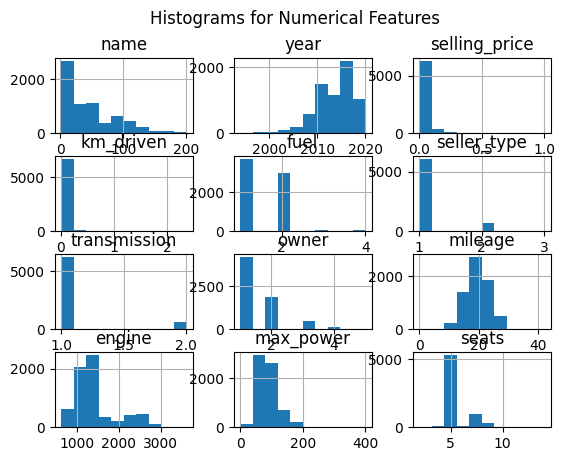

In [43]:
plt.figure(figsize=(12, 8))
cars_data.hist()
plt.suptitle('Histograms for Numerical Features')
plt.show()

# Box plots for numerical features

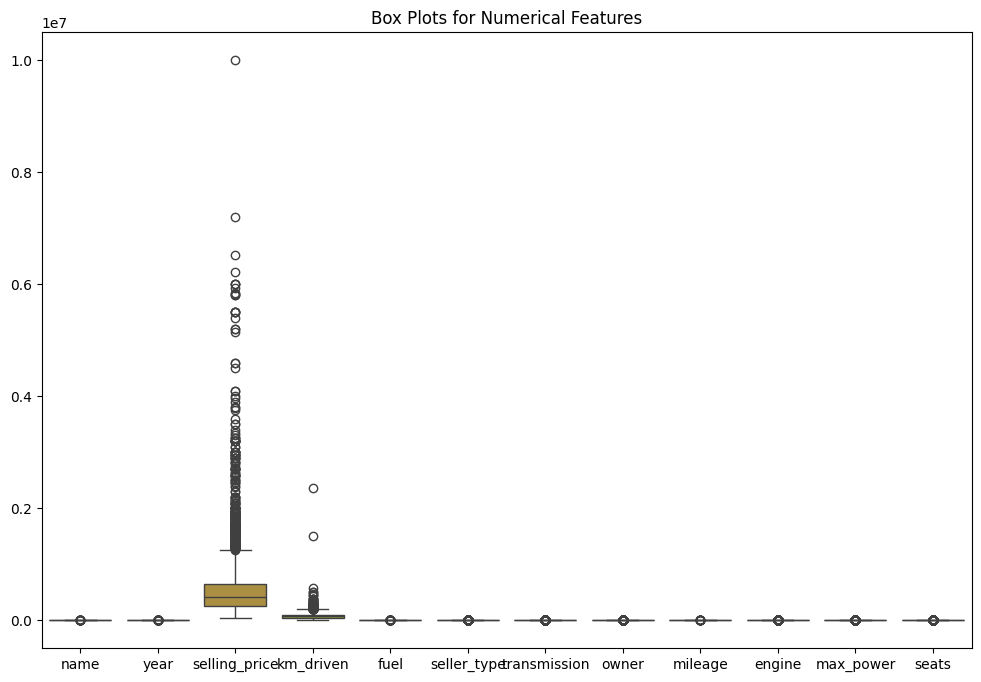

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=cars_data, orient='v')
plt.title('Box Plots for Numerical Features')
plt.show()

# Pair plot for numerical features

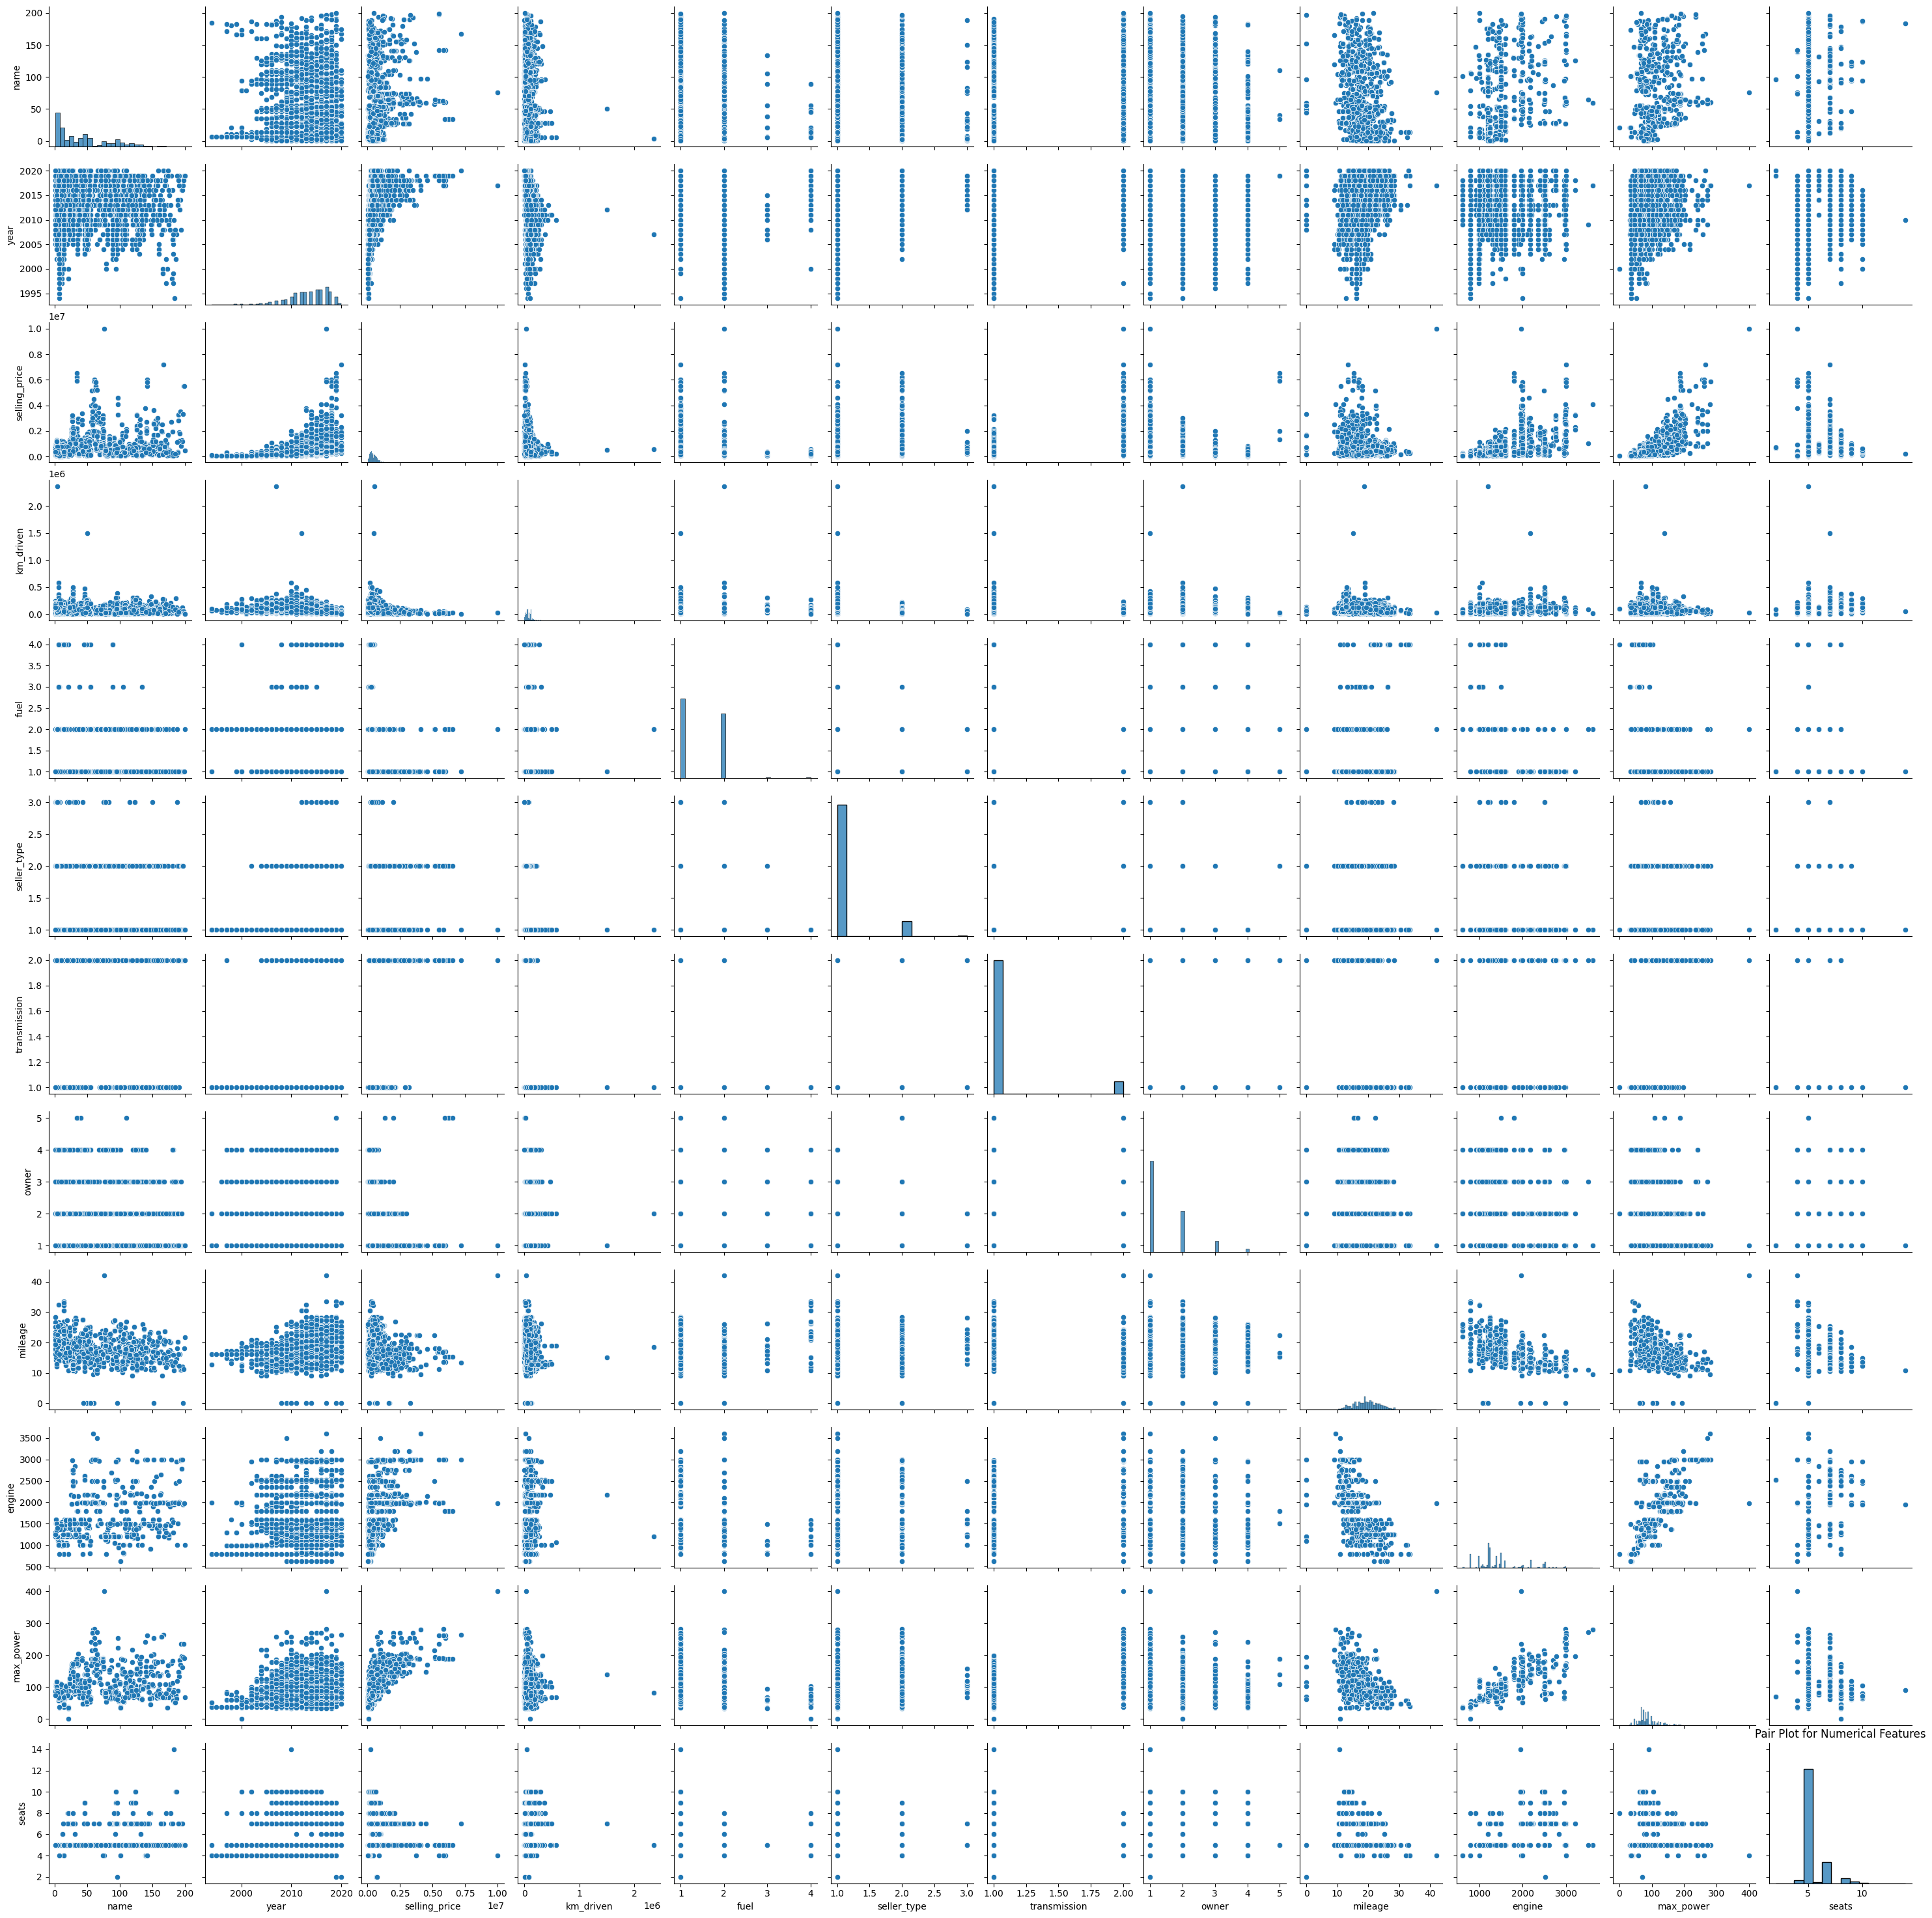

In [45]:
sns.pairplot(cars_data)
plt.title('Pair Plot for Numerical Features')
plt.show()

# Feature Distribution

<ipython-input-46-e5081e429aff>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cars_data['selling_price'], shade=True)


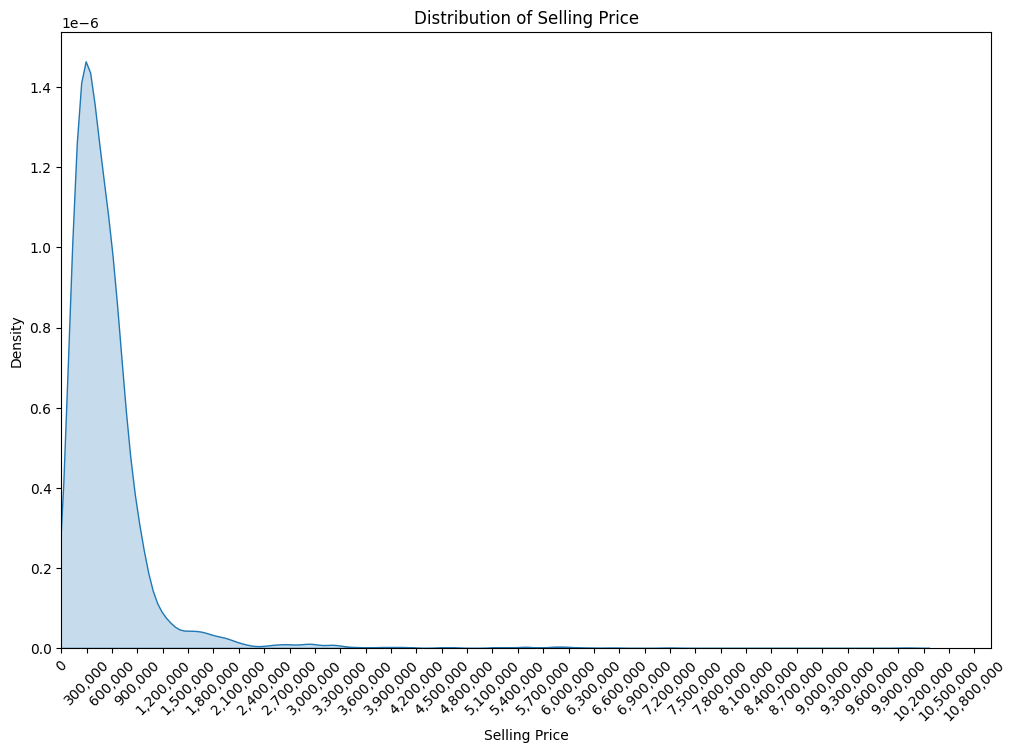

In [46]:
import matplotlib.ticker as ticker
def currency_formatter(x, pos):
    """Formats a number as currency string with commas and no decimals."""
    return f"{x:,.0f}"

plt.figure(figsize=(12, 8))
sns.kdeplot(cars_data['selling_price'], shade=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Density')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)  # Adjust font size of y-axis labels
plt.xlim(0, max(cars_data['selling_price']) * 1.1)  # Adjust the multiplier for better spacing

# Set the formatter for the x-axis
formatter = ticker.FuncFormatter(currency_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Reduce the number of ticks for better spacing (adjust nbins as needed)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=40))  # Adjust nbins for desired number of ticks

plt.show()




# Feature Relationships

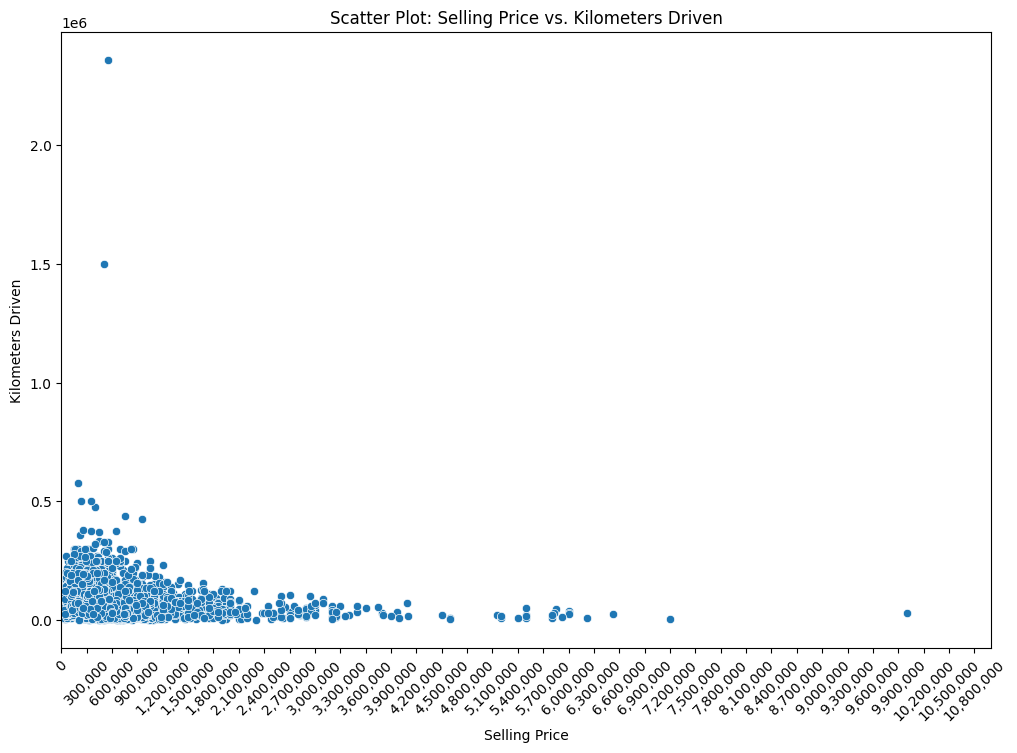

In [47]:
import matplotlib.ticker as ticker
def currency_formatter(x, pos):
    """Formats a number as currency string with commas and no decimals."""
    return f"{x:,.0f}"
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cars_data, x='selling_price', y='km_driven')
plt.title('Scatter Plot: Selling Price vs. Kilometers Driven')
plt.xlabel('Selling Price')
plt.ylabel('Kilometers Driven')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)  # Adjust font size of y-axis labels
plt.xlim(0, max(cars_data['selling_price']) * 1.1)  # Adjust the multiplier for better spacing

# Set the formatter for the x-axis
formatter = ticker.FuncFormatter(currency_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Reduce the number of ticks for better spacing (adjust nbins as needed)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=40))  # Adjust nbins for desired number of ticks

plt.show()

# Target Distribution


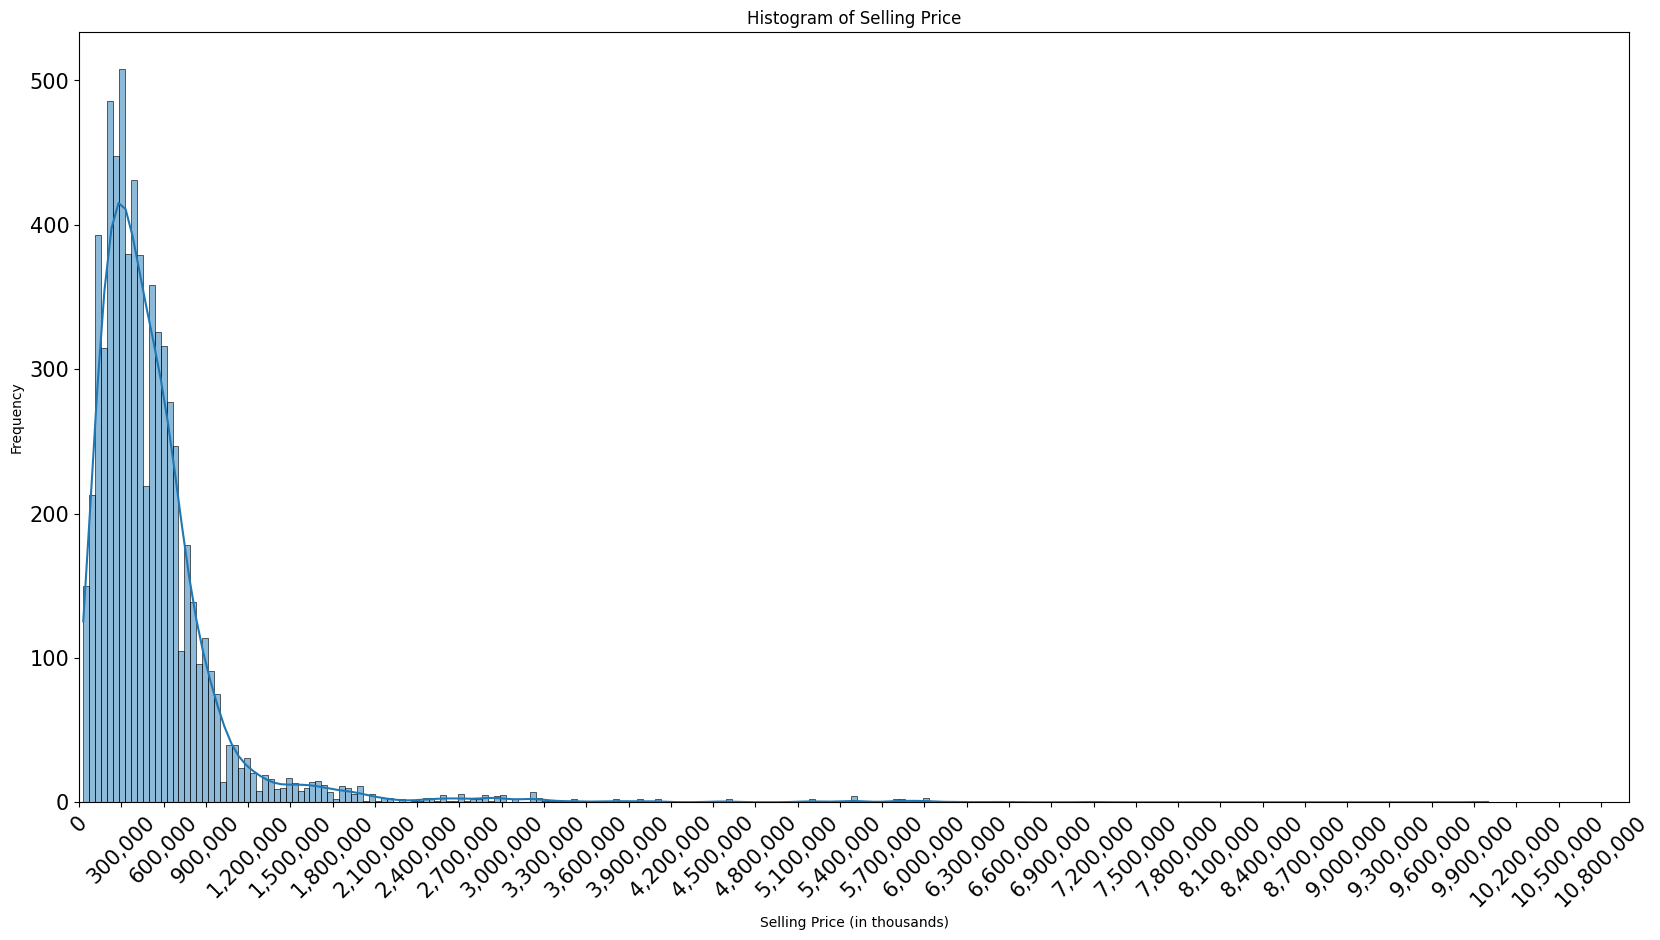

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


def currency_formatter(x, pos):
    """Formats a number as currency string with commas and no decimals."""
    return f"{x:,.0f}"

plt.figure(figsize=(20, 10))
sns.histplot(data=cars_data, x='selling_price', kde=True)
plt.title('Histogram of Selling Price')

plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xticks(fontsize=15)  # Adjust font size of y-axis labels
plt.yticks(fontsize=15)
plt.xlim(0, max(cars_data['selling_price']) * 1.1)  # Adjust the multiplier for better spacing

plt.xlabel('Selling Price (in thousands)')  # Change the label to reflect the new formatting

# Set the formatter for the x-axis
formatter = ticker.FuncFormatter(currency_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Reduce the number of ticks for better spacing (adjust nbins as needed)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=40))  # Adjust nbins for desired number of ticks

plt.show()


# Correlation Analysis

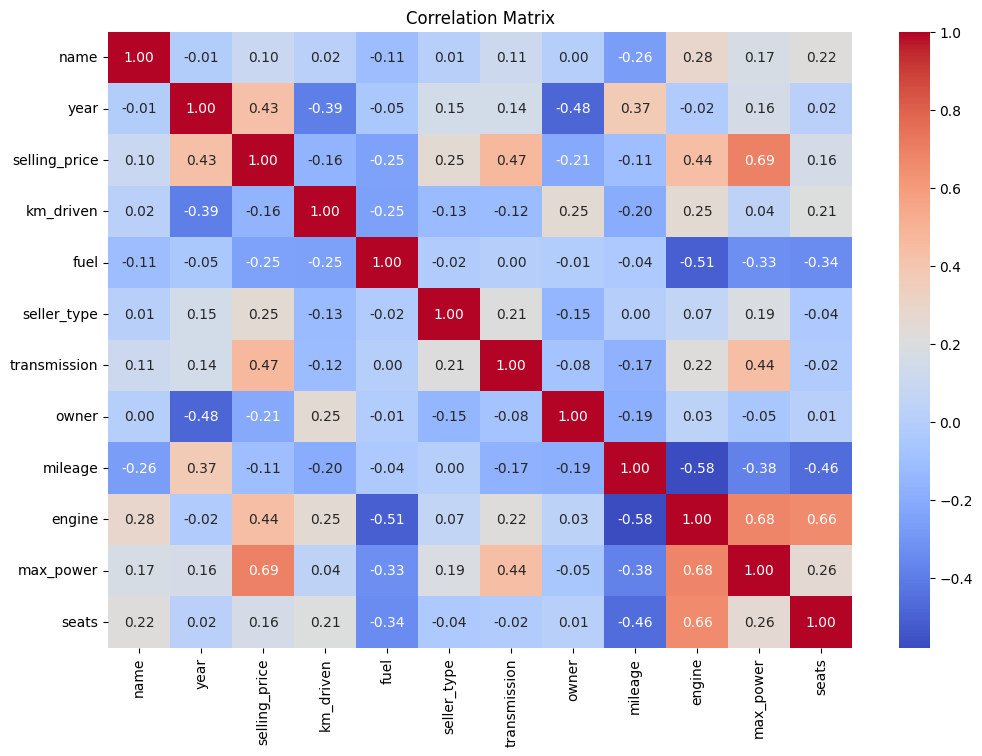

In [49]:
plt.figure(figsize=(12, 8))
corr_matrix = cars_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Split the data into training and testing sets

In [50]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

#Model Creation

1. Linear Regression
2. RandomForestRegressor
3. GradientBoostingRegressor
4. XGBRegressor

## Training and Testing


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


* Linear Regression

In [52]:
# Initialize the model
linear_regression_model = LinearRegression()

In [53]:
# Train the model
linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [54]:
# Make predictions on the testing set
linear_regression_predictions = linear_regression_model.predict(x_test)

In [55]:
# Evaluate the model
linear_regression_mae_train = mean_absolute_error(y_test, linear_regression_predictions)
linear_regression_mse_train = mean_squared_error(y_test, linear_regression_predictions)
linear_regression_r2_train = r2_score(y_test, linear_regression_predictions)

In [56]:
# Calculate accuracy based on a threshold
threshold=0.1
absolute_percentage_error_lr = np.abs(y_test - linear_regression_predictions) / y_test
within_threshold_lr = np.sum(absolute_percentage_error_lr < threshold)
accuracy_lr = within_threshold_lr / len(y_test)

# Print evaluation metrics
print("Linear Regression Model Evaluation:")
print("Mean Absolute Error:", linear_regression_mae_train)
print("Mean Squared Error:", linear_regression_mse_train)
print("R-squared:", linear_regression_r2_train)

Linear Regression Model Evaluation:
Mean Absolute Error: 165262.5223235766
Mean Squared Error: 58982446707.44833
R-squared: 0.6652904892862297


* Random Forest

In [57]:
# Initialize the model
random_forest_model = RandomForestRegressor()

In [58]:
# Train the model
random_forest_model.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
# Make predictions on the testing set
random_forest_predictions = random_forest_model.predict(x_test)

In [60]:
 # Evaluate the model
random_forest_mae_train = mean_absolute_error(y_test, random_forest_predictions)
random_forest_mse_train = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2_train = r2_score(y_test, random_forest_predictions)

In [61]:
# Calculate accuracy based on a threshold
threshold = 0.1
absolute_percentage_error_rf = np.abs(y_test - random_forest_predictions) / y_test
within_threshold_rf = np.sum(absolute_percentage_error_rf < threshold)
accuracy_rf = within_threshold_rf / len(y_test)

# Print evaluation metrics
print("Random Forest Model Evaluation:")
print("Mean Absolute Error:", random_forest_mae_train)
print("Mean Squared Error:", random_forest_mse_train)
print("R-squared:", random_forest_r2_train)


Random Forest Model Evaluation:
Mean Absolute Error: 75011.12142360468
Mean Squared Error: 19396494561.269096
R-squared: 0.8899301136766026


* Gradient Boosting

In [62]:
# Initialize the model
gradient_boosting_model = GradientBoostingRegressor()

In [63]:
# Train the model
gradient_boosting_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [64]:
# Make predictions on the testing set
gradient_boosting_predictions = gradient_boosting_model.predict(x_test)


In [65]:
# Evaluate the model
gradient_boosting_mae_train = mean_absolute_error(y_test, gradient_boosting_predictions)
gradient_boosting_mse_train = mean_squared_error(y_test, gradient_boosting_predictions)
gradient_boosting_r2_train = r2_score(y_test, gradient_boosting_predictions)

In [66]:
# Calculate accuracy based on a threshold
absolute_percentage_error_gb = np.abs(y_test - gradient_boosting_predictions) / y_test
within_threshold_gb = np.sum(absolute_percentage_error_gb < threshold)
accuracy_gb = within_threshold_gb / len(y_test)

# Print evaluation metrics
print("Gradient Boosting Model Evaluation:")
print("Mean Absolute Error:", gradient_boosting_mae_train)
print("Mean Squared Error:", gradient_boosting_mse_train)
print("R-squared:", gradient_boosting_r2_train)


Gradient Boosting Model Evaluation:
Mean Absolute Error: 84650.58223332296
Mean Squared Error: 20794206395.22187
R-squared: 0.8819984751947065


* XGBoost

In [67]:
# Initialize the model
xgb_model = XGBRegressor()

In [68]:
# Train the model
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
# Make predictions on the testing set
xgb_predictions = xgb_model.predict(x_test)

In [70]:
# Evaluate the model
xgb_mae_train = mean_absolute_error(y_test, xgb_predictions)
xgb_mse_train = mean_squared_error(y_test, xgb_predictions)
xgb_r2_train = r2_score(y_test, xgb_predictions)

In [71]:
# Calculate accuracy based on a threshold
absolute_percentage_error_xgb = np.abs(y_test - xgb_predictions) / y_test
within_threshold_xgb = np.sum(absolute_percentage_error_xgb < threshold)
accuracy_xgb = within_threshold_xgb / len(y_test)

# Print evaluation metrics
print("XGBoost Model Evaluation:")
print("Mean Absolute Error:", xgb_mae_train)
print("Mean Squared Error:", xgb_mse_train)
print("R-squared:", xgb_r2_train)


XGBoost Model Evaluation:
Mean Absolute Error: 73985.57564581008
Mean Squared Error: 20079687130.121284
R-squared: 0.8860531797206749


In [72]:
import pickle

# Define a list of trained models
trained_models = {
    'linear_regression_model': linear_regression_model,
    'random_forest_model': random_forest_model,
    'xgb_model': xgb_model,
    'gb_model': gradient_boosting_model
}

# Save each trained model to a separate pickle file
for model_name, model in trained_models.items():
    with open(f'{model_name}.pkl', 'wb') as f:
        pickle.dump(model, f)


Testing

* Linear Regression

In [73]:
# Make predictions on the testing set
linear_regression_predictions = linear_regression_model.predict(x_test)

In [74]:
# Evaluate the model
linear_regression_mae = mean_absolute_error(y_test, linear_regression_predictions)
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
linear_regression_r2 = r2_score(y_test, linear_regression_predictions)

In [75]:
# Calculate accuracy based on a threshold
threshold=0.1
absolute_percentage_error_lr = np.abs(y_test - linear_regression_predictions) / y_test
within_threshold_lr = np.sum(absolute_percentage_error_lr < threshold)
accuracy_lr = within_threshold_lr / len(y_test)

# Print evaluation metrics
print("Linear Regression Model Evaluation:")
print("Mean Absolute Error:", linear_regression_mae)
print("Mean Squared Error:", linear_regression_mse)
print("R-squared:", linear_regression_r2)


Linear Regression Model Evaluation:
Mean Absolute Error: 165262.5223235766
Mean Squared Error: 58982446707.44833
R-squared: 0.6652904892862297


* Random Forest

In [76]:
# Make predictions on the testing set
random_forest_predictions = random_forest_model.predict(x_test)

In [77]:
# Evaluate the model
random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

In [78]:
# Calculate accuracy based on a threshold
threshold = 0.1
absolute_percentage_error_rf = np.abs(y_test - random_forest_predictions) / y_test
within_threshold_rf = np.sum(absolute_percentage_error_rf < threshold)
accuracy_rf = within_threshold_rf / len(y_test)

# Print evaluation metrics
print("Random Forest Model Evaluation:")
print("Mean Absolute Error:", random_forest_mae)
print("Mean Squared Error:", random_forest_mse)
print("R-squared:", random_forest_r2)


Random Forest Model Evaluation:
Mean Absolute Error: 75011.12142360468
Mean Squared Error: 19396494561.269096
R-squared: 0.8899301136766026


* Gradient Boosting

In [79]:
# Make predictions on the testing set
gradient_boosting_predictions = gradient_boosting_model.predict(x_test)


In [80]:
# Evaluate the model
gradient_boosting_mae = mean_absolute_error(y_test, gradient_boosting_predictions)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_predictions)

In [81]:
# Calculate accuracy based on a threshold
absolute_percentage_error_gb = np.abs(y_test - gradient_boosting_predictions) / y_test
within_threshold_gb = np.sum(absolute_percentage_error_gb < threshold)
accuracy_gb = within_threshold_gb / len(y_test)

# Print evaluation metrics
print("Gradient Boosting Model Evaluation:")
print("Mean Absolute Error:", gradient_boosting_mae)
print("Mean Squared Error:", gradient_boosting_mse)
print("R-squared:", gradient_boosting_r2)


Gradient Boosting Model Evaluation:
Mean Absolute Error: 84650.58223332296
Mean Squared Error: 20794206395.22187
R-squared: 0.8819984751947065


* XGBoost

In [82]:
# Make predictions on the testing set
xgb_predictions = xgb_model.predict(x_test)

In [83]:
# Evaluate the model
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

In [84]:
# Calculate accuracy based on a threshold
absolute_percentage_error_xgb = np.abs(y_test - xgb_predictions) / y_test
within_threshold_xgb = np.sum(absolute_percentage_error_xgb < threshold)
accuracy_xgb = within_threshold_xgb / len(y_test)

# Print evaluation metrics
print("XGBoost Model Evaluation:")
print("Mean Absolute Error:", xgb_mae)
print("Mean Squared Error:", xgb_mse)
print("R-squared:", xgb_r2)


XGBoost Model Evaluation:
Mean Absolute Error: 73985.57564581008
Mean Squared Error: 20079687130.121284
R-squared: 0.8860531797206749


* Analysis

->Model comparison

In [85]:
# Create a DataFrame to store the evaluation metrics
evaluation_metrics = pd.DataFrame(columns=['Model', 'R-squared(Train)','R-squared(Trsting)', 'MAE (Train)', 'MAE (Testing)', 'MSE (Train)', 'MSE (Testing)'])


In [86]:
# Add data for Linear Regression model
evaluation_metrics.loc[0] = {
    'Model': 'Linear Regression',
    'R-squared(Train)': linear_regression_r2_train,
    'MAE (Train)': linear_regression_mae_train,
    'MSE (Train)': linear_regression_mse_train,
    'R-squared(Testing)': linear_regression_r2,
    'MAE (Testing)': linear_regression_mae,
    'MSE (Testing)': linear_regression_mse
}

# Add data for Random Forest model
evaluation_metrics.loc[1] = {
    'Model': 'Random Forest',
    'R-squared(Train)': random_forest_r2_train,
    'MAE (Train)': random_forest_mae_train,
    'MSE (Train)': random_forest_mse_train,
    'R-squared(Testing)': random_forest_r2,
    'MAE (Testing)': random_forest_mae,
    'MSE (Testing)': random_forest_mse
}

# Add data for XGBoost model
evaluation_metrics.loc[2] = {
    'Model': 'XGBoost',
    'R-squared(Train)': xgb_r2_train,
    'MAE (Train)': xgb_mae_train,
    'MSE (Train)': xgb_mse_train,
    'R-squared(Testing)': xgb_r2,
    'MAE (Testing)': xgb_mae,
    'MSE (Testing)': xgb_mse
}

# Add data for Gradient Boosting model
evaluation_metrics.loc[3] = {
    'Model': 'Gradient Boosting',
    'R-squared(Trian)': gradient_boosting_r2_train ,
    'MAE (Train)': gradient_boosting_mae_train,
    'MSE (Train)': gradient_boosting_mse_train,
    'R-squared(Testing)': gradient_boosting_r2,
    'MAE (Testing)': gradient_boosting_mae,
    'MSE (Testing)': gradient_boosting_mse
}

# Display the DataFrame
print(evaluation_metrics)

               Model  R-squared(Train)  R-squared(Trsting)    MAE (Train)  \
0  Linear Regression          0.665290                 NaN  165262.522324   
1      Random Forest          0.889930                 NaN   75011.121424   
2            XGBoost          0.886053                 NaN   73985.575646   
3  Gradient Boosting               NaN                 NaN   84650.582233   

   MAE (Testing)   MSE (Train)  MSE (Testing)  
0  165262.522324  5.898245e+10   5.898245e+10  
1   75011.121424  1.939649e+10   1.939649e+10  
2   73985.575646  2.007969e+10   2.007969e+10  
3   84650.582233  2.079421e+10   2.079421e+10  


In [87]:
# Create an empty DataFrame to store error metrics
error_table = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE'])

# Calculate RMSE for each model
linear_regression_rmse = np.sqrt(linear_regression_mse)
random_forest_rmse = np.sqrt(random_forest_mse)
gradient_boosting_rmse = np.sqrt(gradient_boosting_mse)
xgb_rmse = np.sqrt(xgb_mse)

# Add error metrics for Linear Regression
error_table.loc[0] = {
    'Model': 'Linear Regression',
    'MAE': linear_regression_mae,
    'MSE': linear_regression_mse,
    'RMSE': linear_regression_rmse
}

# Add error metrics for Random Forest
error_table.loc[1] = {
    'Model': 'Random Forest',
    'MAE': random_forest_mae,
    'MSE': random_forest_mse,
    'RMSE': random_forest_rmse
}

# Add error metrics for XGBoost
error_table.loc[2] = {
    'Model': 'XGBoost',
    'MAE': xgb_mae,
    'MSE': xgb_mse,
    'RMSE': xgb_rmse
}

# Add error metrics for Gradient Boosting
error_table.loc[3] = {
    'Model': 'Gradient Boosting',
    'MAE': gradient_boosting_mae,
    'MSE': gradient_boosting_mse,
    'RMSE': gradient_boosting_rmse
}

# Display the error table
print(error_table)

               Model            MAE           MSE           RMSE
0  Linear Regression  165262.522324  5.898245e+10  242863.020461
1      Random Forest   75011.121424  1.939649e+10  139271.298412
2            XGBoost   73985.575646  2.007969e+10  141702.812711
3  Gradient Boosting   84650.582233  2.079421e+10  144201.963909


In [88]:
# Load the trained Random Forest model
random_forest_model = RandomForestRegressor()  # Initialize the model
random_forest_model.fit(x_train, y_train)  # Assuming x_train and y_train are your training data

RandomForestRegressor()

In [89]:
# Prepare the input data for prediction
input_data_for_prediction = pd.DataFrame(
    [[2, 2020, 50000, 1, 1, 1, 1, 12.99, 2494.0, 100.6, 5.0]],
    columns=['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])

# Make predictions
predictions = random_forest_model.predict(input_data_for_prediction)

# Display the predictions
print("Predictions:", predictions)

Predictions: [839569.98]


* Error analysis

In [90]:
# Calculate accuracy on training set
accuracy_lr_train = linear_regression_model.score(x_train, y_train)

# Calculate accuracy on testing set
accuracy_lr_test = linear_regression_model.score(x_test, y_test)

# Calculate root mean squared error
rmse_lr = np.sqrt(linear_regression_mse)

# Create the error table for Linear Regression model
error_table_lr = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Mean Absolute Error': [linear_regression_mae],
    'Mean Squared Error': [linear_regression_mse],
    'Root Mean Squared Error': [rmse_lr],
    'Accuracy on Training Set': [accuracy_lr_train],
    'Accuracy on Testing Set': [accuracy_lr_test]
})

# Display the error table for Linear Regression model
print("Error Table for Linear Regression Model:")
print(error_table_lr)


Error Table for Linear Regression Model:
               Model  Mean Absolute Error  Mean Squared Error  \
0  Linear Regression        165262.522324        5.898245e+10   

   Root Mean Squared Error  Accuracy on Training Set  Accuracy on Testing Set  
0            242863.020461                   0.60923                  0.66529  


In [91]:
# Calculate accuracy on training set
accuracy_rf_train = random_forest_model.score(x_train, y_train)

# Calculate accuracy on testing set
accuracy_rf_test = random_forest_model.score(x_test, y_test)

# Calculate root mean squared error
rmse_rf = np.sqrt(random_forest_mse)

# Create the error table
error_table_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'Mean Absolute Error': [random_forest_mae],
    'Mean Squared Error': [random_forest_mse],
    'Root Mean Squared Error': [rmse_rf],
    'Accuracy on Training Set': [accuracy_rf_train],
    'Accuracy on Testing Set': [accuracy_rf_test]
})

# Display the error table
print("Error Table for Random Forest Model:")
print(error_table_rf)


Error Table for Random Forest Model:
           Model  Mean Absolute Error  Mean Squared Error  \
0  Random Forest         75011.121424        1.939649e+10   

   Root Mean Squared Error  Accuracy on Training Set  Accuracy on Testing Set  
0            139271.298412                  0.986034                  0.89258  


In [92]:
# Calculate accuracy on training set
accuracy_gb_train = gradient_boosting_model.score(x_train, y_train)

# Calculate accuracy on testing set
accuracy_gb_test = gradient_boosting_model.score(x_test, y_test)

# Calculate root mean squared error
rmse_gb = np.sqrt(gradient_boosting_mse)

# Create the error table for Gradient Boosting model
error_table_gb = pd.DataFrame({
    'Model': ['Gradient Boosting'],
    'Mean Absolute Error': [gradient_boosting_mae],
    'Mean Squared Error': [gradient_boosting_mse],
    'Root Mean Squared Error': [rmse_gb],
    'Accuracy on Training Set': [accuracy_gb_train],
    'Accuracy on Testing Set': [accuracy_gb_test]
})

# Display the error table for Gradient Boosting model
print("Error Table for Gradient Boosting Model:")
print(error_table_gb)

Error Table for Gradient Boosting Model:
               Model  Mean Absolute Error  Mean Squared Error  \
0  Gradient Boosting         84650.582233        2.079421e+10   

   Root Mean Squared Error  Accuracy on Training Set  Accuracy on Testing Set  
0            144201.963909                  0.948158                 0.881998  


In [93]:
# Calculate accuracy on training set
accuracy_xgb_train = xgb_model.score(x_train, y_train)

# Calculate accuracy on testing set
accuracy_xgb_test = xgb_model.score(x_test, y_test)

# Calculate root mean squared error
rmse_xgb = np.sqrt(xgb_mse)

# Create the error table for XGBoost model
error_table_xgb = pd.DataFrame({
    'Model': ['XGBoost'],
    'Mean Absolute Error': [xgb_mae],
    'Mean Squared Error': [xgb_mse],
    'Root Mean Squared Error': [rmse_xgb],
    'Accuracy on Training Set': [accuracy_xgb_train],
    'Accuracy on Testing Set': [accuracy_xgb_test]
})

# Display the error table for XGBoost model
print("Error Table for XGBoost Model:")
print(error_table_xgb)

Error Table for XGBoost Model:
     Model  Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  \
0  XGBoost         73985.575646        2.007969e+10            141702.812711   

   Accuracy on Training Set  Accuracy on Testing Set  
0                  0.990357                 0.886053  


In [94]:
print()
print(error_table_lr)
print(error_table_rf)
print(error_table_gb)
print(error_table_xgb)


               Model  Mean Absolute Error  Mean Squared Error  \
0  Linear Regression        165262.522324        5.898245e+10   

   Root Mean Squared Error  Accuracy on Training Set  Accuracy on Testing Set  
0            242863.020461                   0.60923                  0.66529  
           Model  Mean Absolute Error  Mean Squared Error  \
0  Random Forest         75011.121424        1.939649e+10   

   Root Mean Squared Error  Accuracy on Training Set  Accuracy on Testing Set  
0            139271.298412                  0.986034                  0.89258  
               Model  Mean Absolute Error  Mean Squared Error  \
0  Gradient Boosting         84650.582233        2.079421e+10   

   Root Mean Squared Error  Accuracy on Training Set  Accuracy on Testing Set  
0            144201.963909                  0.948158                 0.881998  
     Model  Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  \
0  XGBoost         73985.575646        2.007969e+10   

# Prediction

In [95]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [96]:
# Prepare the input data for prediction
input_data_for_prediction = pd.DataFrame(
    [[2, 2005, 100000, 1, 1, 1, 1, 17.99, 2494.0, 100.6, 5.0]],
    columns=['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])

# Make predictions
predictions = xgb_model.predict(input_data_for_prediction)

# Display the predictions
print("Predictions:", predictions)

Predictions: [374733.7]


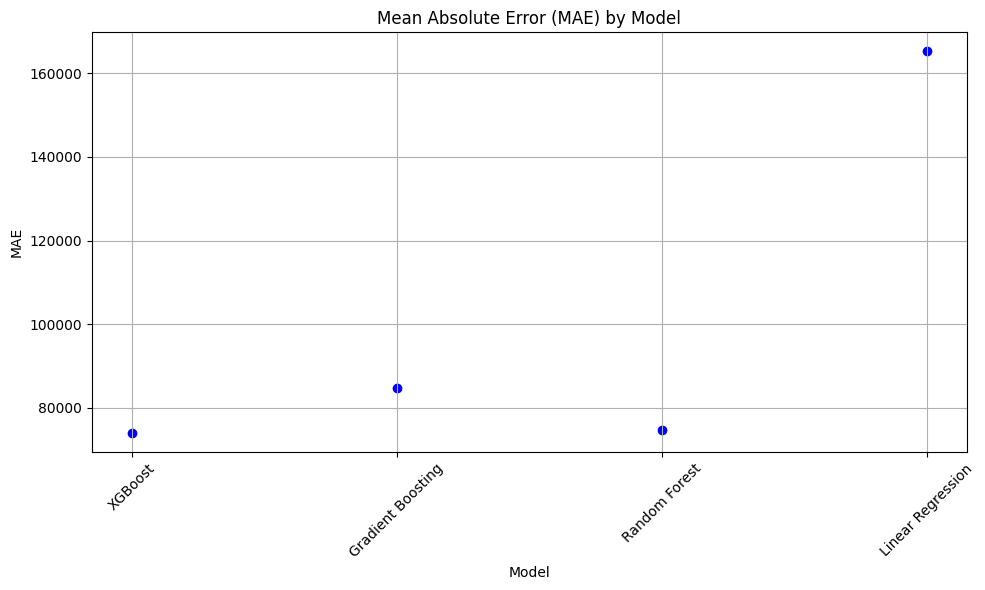

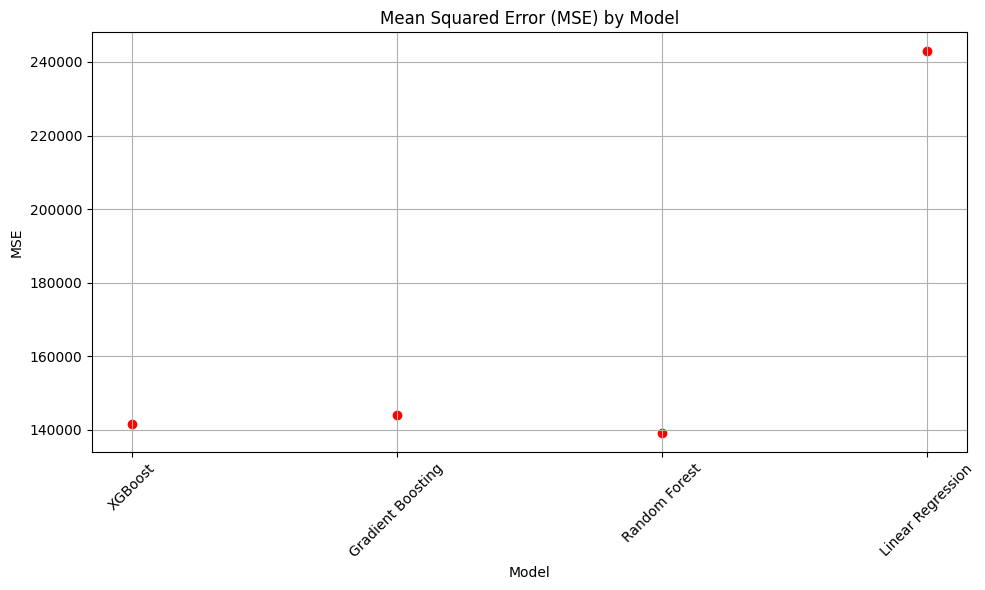

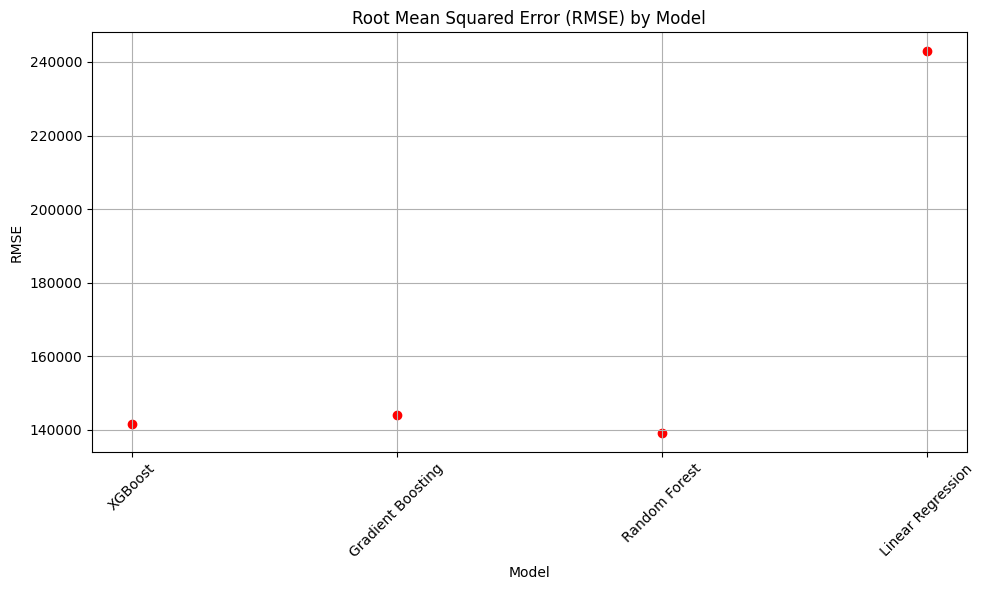

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the following error data (replace with your actual data)
model_names = ["XGBoost", "Gradient Boosting", "Random Forest", "Linear Regression"]
mae = [73985.575646, 84597.897768, 74698.106455, 165262.522324]
rmse = [141702.812711, 144130.55563, 139179.478748, 242863.020461]

# Create a scatter plot to visualize errors (MAE) vs. models
plt.figure(figsize=(10, 6))
plt.scatter(model_names, mae, marker='o', color='b', label='MAE')
plt.title('Mean Absolute Error (MAE) by Model')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a scatter plot to visualize errors (MSE) vs. models
plt.figure(figsize=(10, 6))
plt.scatter(model_names, rmse, marker='o', color='r', label='MSE')
plt.title('Mean Squared Error (MSE) by Model')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Create another scatter plot to visualize errors (RMSE) vs. models
plt.figure(figsize=(10, 6))
plt.scatter(model_names, rmse, marker='o', color='r', label='RMSE')
plt.title('Root Mean Squared Error (RMSE) by Model')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [101]:
def plot_predictions(model_name, y_actual, y_predicted):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_predicted, color='blue', alpha=0.5)
    plt.title(f'{model_name} Predictions vs Actual')
    plt.xlabel('Actual Selling Price')
    plt.ylabel('Predicted Selling Price')
    plt.grid(True)
    plt.show()

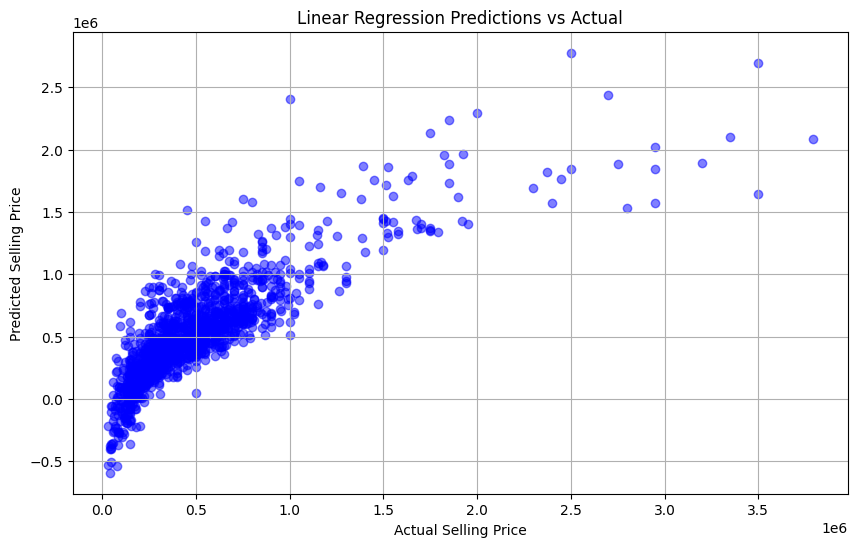

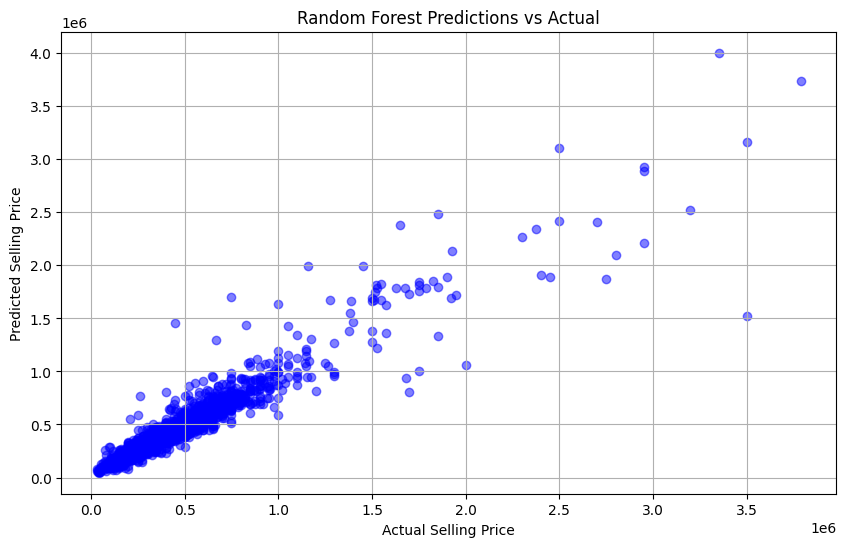

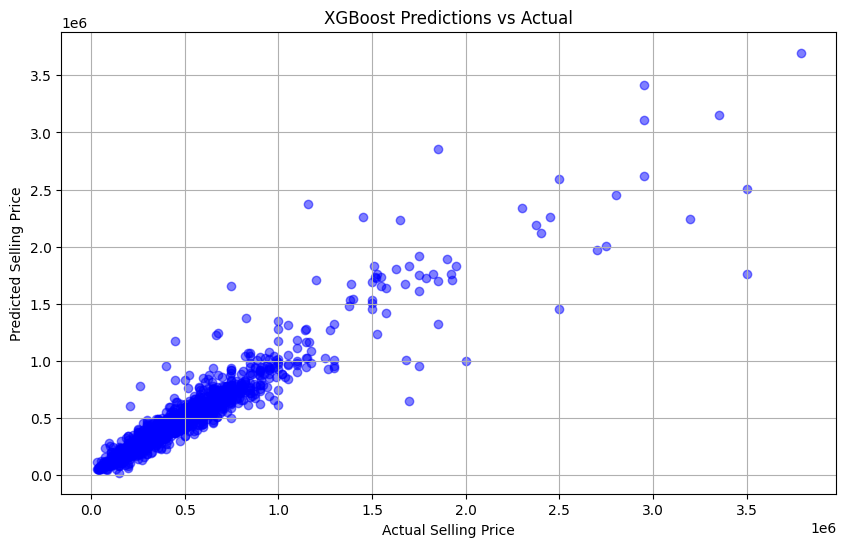

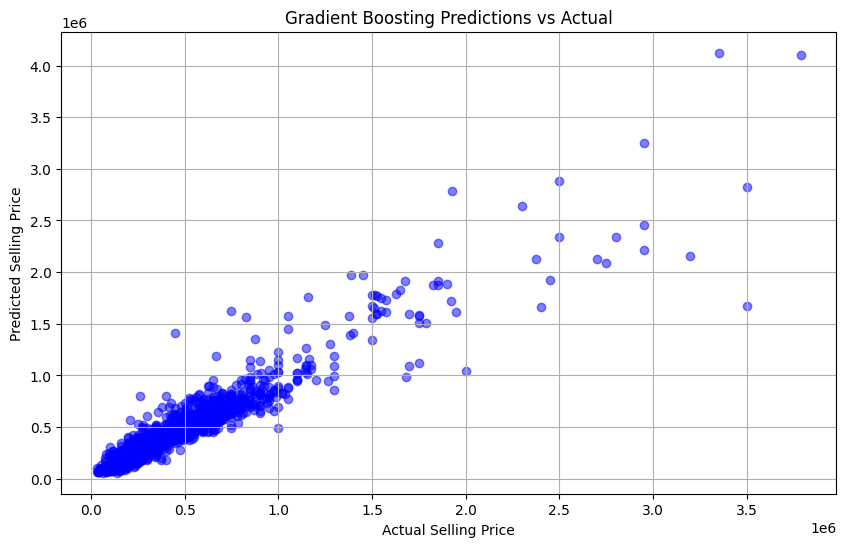

In [100]:
# Plot predictions for Linear Regression
plot_predictions('Linear Regression', y_test, linear_regression_predictions)

# Plot predictions for Random Forest
plot_predictions('Random Forest', y_test, random_forest_predictions)

# Plot predictions for XGBoost
plot_predictions('XGBoost', y_test, xgb_predictions)

# Plot predictions for Gradient Boosting
plot_predictions('Gradient Boosting', y_test, gradient_boosting_predictions)

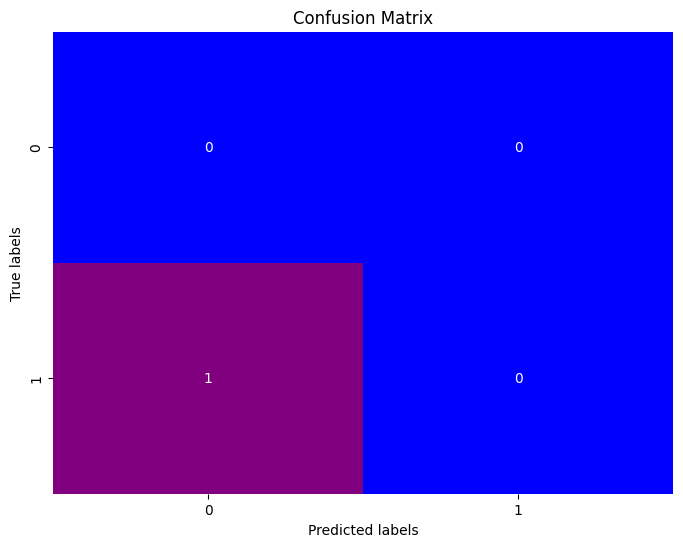

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your model and obtained predictions
y_true = ['y_test']  # True labels
y_pred = ['xgb_prediction']  # Predicted labels

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
colors = ['blue', 'purple']
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=colors,fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
